## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [485]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [486]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

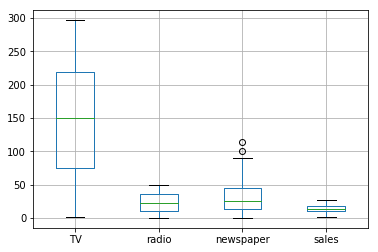

In [487]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

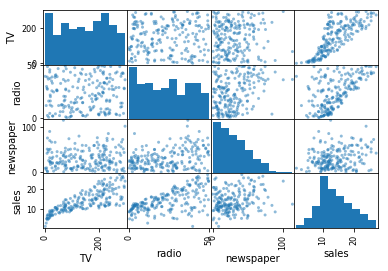

In [488]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

None of the variables seem correlated with one another based on the scatter plot. There does not seem to be any clear relationship distinguishable. On the other hand, both TV and Radio seem to have a linear relationship with Sales.

### Problem 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evaluate performance. 

In [489]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [490]:
y = df.iloc[:,3]
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

b) Set X to be just the features described above in df

In [491]:
X = df.iloc[:,:3]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


c) Randomly split data into training and testing - 80% training, 20% testing.

In [492]:
# Define number of rows in dataframe as size
size = len(df)

# Split features and sales into randomized training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

d) Train model on training data, and make predictions on testing data

In [493]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Create prediction variables
y_test_predict = regr.predict(X_test)
y_predict = regr.predict(X)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [494]:
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((y_test_predict - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 2.95
Variance score: 0.90


The evaluated $R^2$ is 0.86 which is a good score as it is close to 1 but not too close that one would suspect overfitting.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

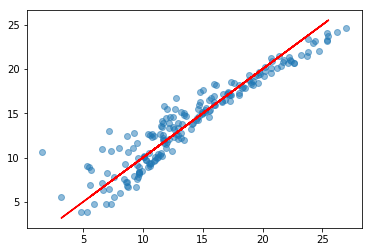

In [495]:
plt.scatter(y,y_predict, alpha=0.5)
plt.plot(y_test,y_test, c='r')

The model does look good as the linear prediction plot follows the linear trend of the scatter plot of the actual values.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

We can see that the performance of the linear regression is fairly good based on the plot and an $R^2$ value of 0.90, which is high enough to deem good performance but not high enough that one would suspect overfitting. However, while we can measure the overall performance this way, measuring the importance of individual features requires us to standardize the coefficients. Below, we will show the importance of standardizing the coefficients.

In [478]:
# The coefficients before standardization
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.04571205  0.18692963 -0.00397992]


<Container object of 3 artists>

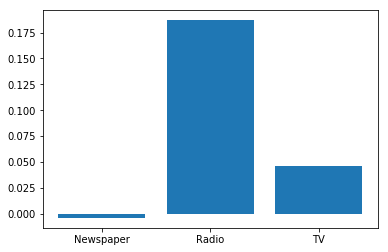

In [479]:
# Plot the coefficients on a bar graph for visual representation
plt.bar(['TV','Radio','Newspaper'],regr.coef_)

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Here we see that the coefficient for Radio is much greater than that of Newspaper or TV. However, a unit change of Radio is not equal to a unit change of Newspaper or TV. We must standardize the features to be able to directly compare the coefficients.

In [480]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

# Perform linear regression again using standardized features
regr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr.fit(X_train, y_train)

# The coefficients before standardization
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 3.86244057  2.77510707 -0.07255814]


<Container object of 3 artists>

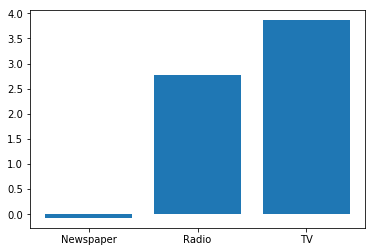

In [481]:
# Re-plot the standardized coefficients on a bar graph for visual representation
plt.bar(['TV','Radio','Newspaper'],regr.coef_)

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

Residual sum of squares: 1.92
Variance score: 0.93


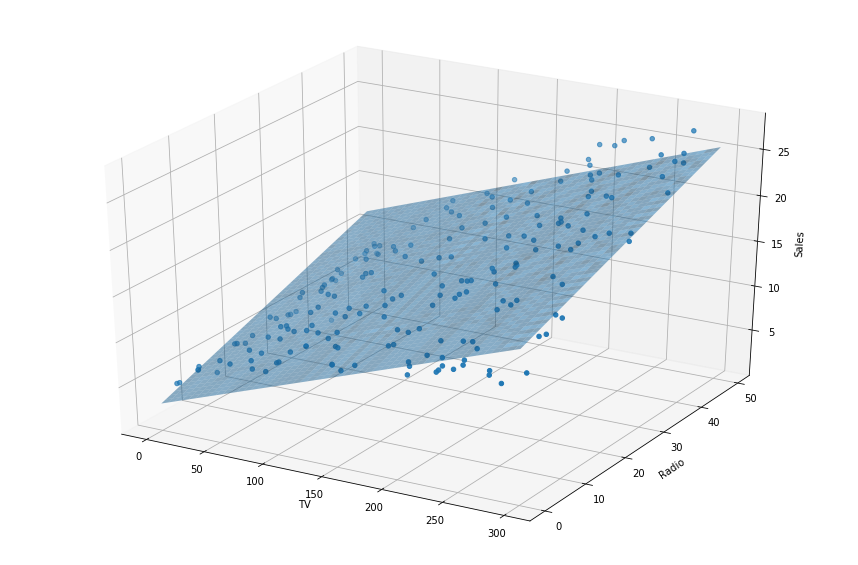

In [482]:
from mpl_toolkits import mplot3d

# We will drop Newspaper due to the low correlation with sales; we must retrain our model to get new coefficients

X = df.iloc[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr.fit(X_train, y_train)
y_test_predict = regr.predict(X_test)
y_predict = regr.predict(X)

# Re-Look at the mean square error and variance score for the retrained model
print("Residual sum of squares: %.2f"
      % np.mean((y_test_predict - y_test) ** 2))
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Create x and y mesh
x_mesh = np.arange(0, 300)
y_mesh = np.arange(0, 50)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)

# Create z mesh using equation for hyperplane in 3D: Sales = beta0 + beta1*TV + beta2*Radio
z_mesh = regr.intercept_ + regr.coef_[0]*x_mesh + regr.coef_[1]*y_mesh # Based on equation above for hyperplane in 3D

# Create the scatter plot and hyperplane
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.5)
ax.scatter(X.iloc[:,0],X.iloc[:,1],y) # Scatter plot of TV, Radio, and Sales
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

To improve performance, we will try a polynomial regression model with an interaction term and once again ignoring Newspaper. This will be in the form of:

$Sales = \beta_0 + \beta_1*TV + \beta_2*Radio + \beta_3*TV^2 + \beta_4*Radio^2 + \beta_5*TV*Radio$

C:\Users\iantf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Residual sum of squares: 0.33
Variance score: 0.99


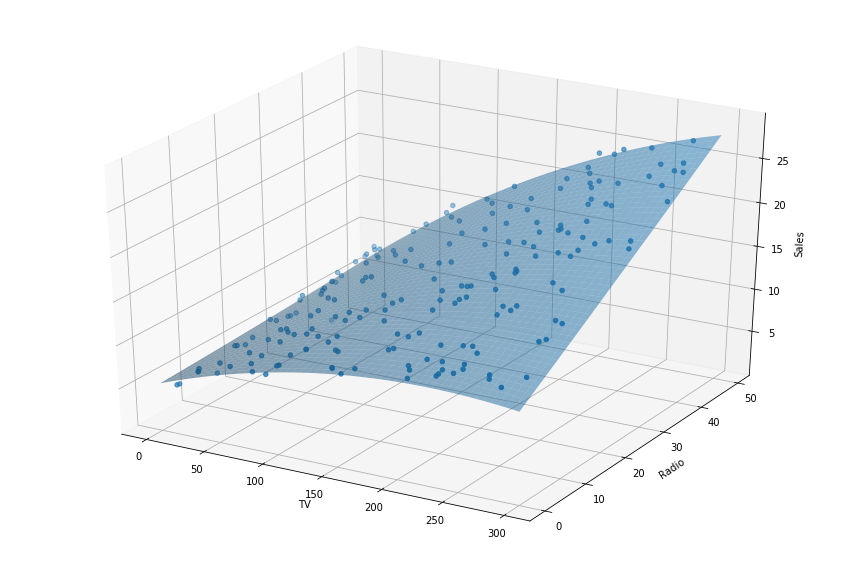

In [483]:
# Add second order polynomial terms and interaction term to dataset
X['TV^2'] = df['TV']**2
X['radio^2'] = df['radio']**2
X['TV*radio'] = df['TV']*df['radio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr.fit(X_train, y_train)
y_test_predict = regr.predict(X_test)
y_predict = regr.predict(X)

# Re-Look at the mean square error and variance score for the retrained model
print("Residual sum of squares: %.2f"
      % np.mean((y_test_predict - y_test) ** 2))
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Create x and y mesh
x_mesh = np.arange(0, 300)
y_mesh = np.arange(0, 50)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)

# Create z mesh using new equation for hyperplane in 3D: Sales = beta0 + beta1*TV + beta2*Radio + beta3*TV^2 + beta4*Radio^2 + beta5*TV*Radio
z_mesh = regr.intercept_ + regr.coef_[0]*x_mesh + regr.coef_[1]*y_mesh + regr.coef_[2]*x_mesh**2 + regr.coef_[3]*y_mesh**2 + regr.coef_[4]*x_mesh*y_mesh # Based on equation above for hyperplane in 3D

# Create the scatter plot and hyperplane
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.5)
ax.scatter(X.iloc[:,0],X.iloc[:,1],y) # Scatter plot of TV, Radio, and Sales
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

The polynomial regression model with an interaction term performs much better with an $R^2$ of 0.99. With an $R^2$ value so close to 1, there may be concern that the model is overfitting. However, because the model is relatively inflexible (highest polynomial order is $X^2$), overfitting is less of a concern and the model looks to be a good fit.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


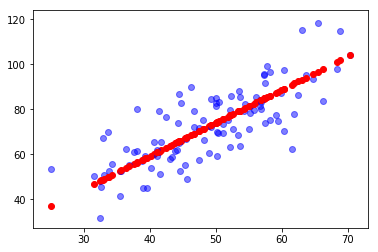

In [522]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1], color='b', alpha=0.5)
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        
run(100)

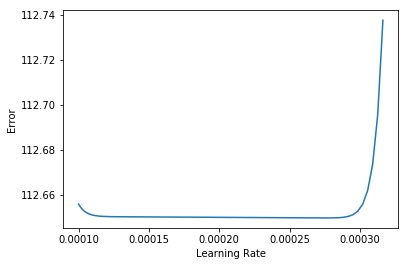

In [524]:
points = genfromtxt("data.csv", delimiter=",")
initial_b = 0
initial_m = 0
num_iterations = 10
learning_rate = logspace(-4,-3.5,100)
error = []
for j in learning_rate:
    [b,m] = gradient_descent_runner(points, initial_b, initial_m, j, num_iterations)
    error.append(compute_error_for_line_given_points(b, m, points))
plt.plot(learning_rate,error)
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.show()

Modifying the learning rate to be larger or smaller provides us with the following findings:
1) Learning rate that is too large may cause us to miss a global minimum and we do not converge at all (divergence begins around a learning rate of 0.0003)
2) Learning rate that is too small may cause us to never reach the global minimum if we keep the number of iterations at 100; we can account for a small learning rate by increasing the number of iterations, but this will cause convergence to be much slower

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


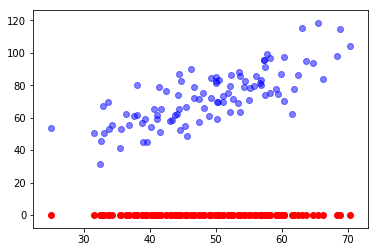

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


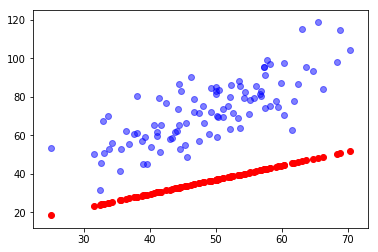

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


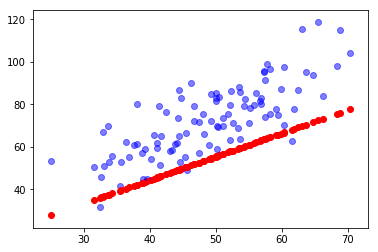

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


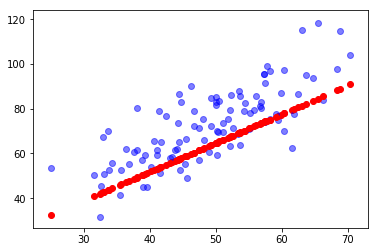

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


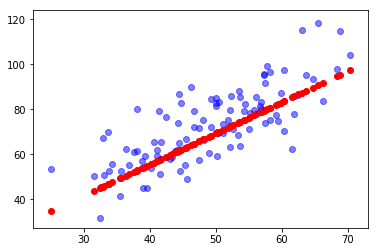

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


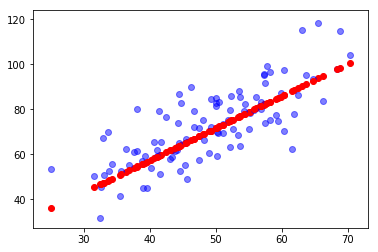

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


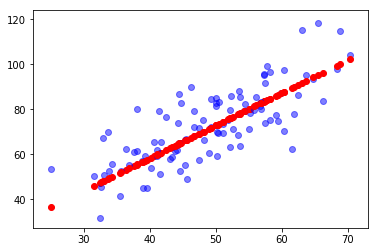

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


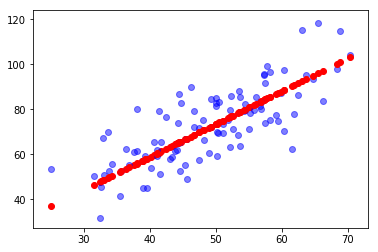

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


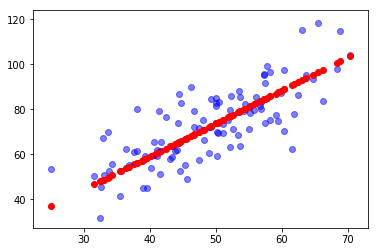

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


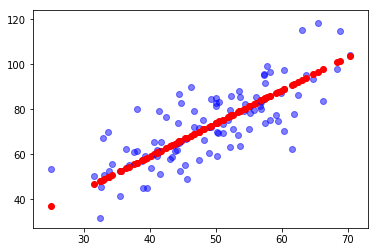

In [465]:
for num in range(0,10):
    run(num)
    plt.show()